<a href="https://colab.research.google.com/github/rodespdi/PDA2526/blob/main/M%C3%A1scara_color_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

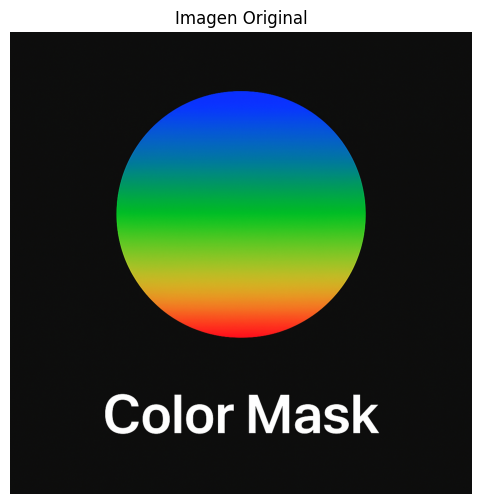

In [1]:
# 1) Importar librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2) Abrir la imagen
image_path = '/content/color_map.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3) Mostrar la imagen original
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.axis('off')
plt.show()

Introduce el valor R (0-255): 0
Introduce el valor G (0-255): 90
Introduce el valor B (0-255): 150
Introduce la tolerancia (ej. 30): 30


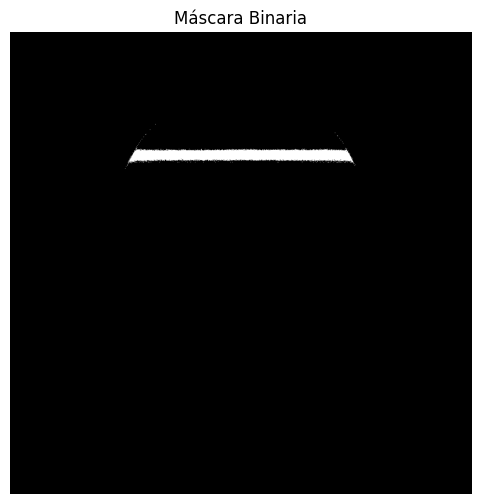

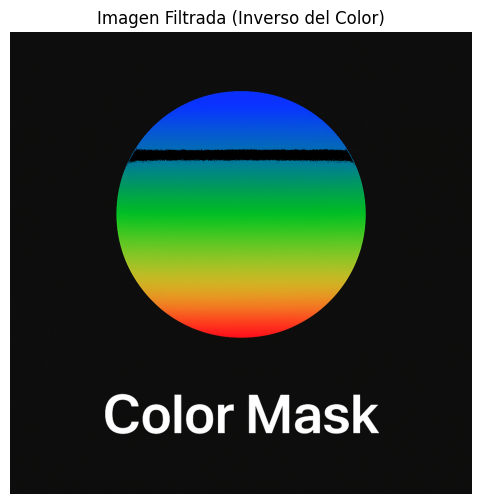

In [6]:
# 4) Pedir valores RGB por prompt
r = int(input("Introduce el valor R (0-255): "))
g = int(input("Introduce el valor G (0-255): "))
b = int(input("Introduce el valor B (0-255): "))

# 5) Pedir tolerancia
tol = int(input("Introduce la tolerancia (ej. 30): "))

# 6) Crear máscara binaria aplicando valores RGB y tolerancia
lower = np.array([r - tol, g - tol, b - tol])
upper = np.array([r + tol, g + tol, b + tol])

# Asegurar límites válidos
lower = np.clip(lower, 0, 255)
upper = np.clip(upper, 0, 255)

mask = cv2.inRange(img_rgb, lower, upper)

# 7) Mostrar la máscara
plt.figure(figsize=(6,6))
plt.imshow(mask, cmap='gray')
plt.title('Máscara Binaria')
plt.axis('off')
plt.show()

# 8) Filtrar los valores inversos al color RGB (invertir máscara)
inverse_mask = cv2.bitwise_not(mask)
filtered_img = cv2.bitwise_and(img_rgb, img_rgb, mask=inverse_mask)

# Mostrar imagen filtrada
plt.figure(figsize=(6,6))
plt.imshow(filtered_img)
plt.title('Imagen Filtrada (Inverso del Color)')
plt.axis('off')
plt.show()


In [5]:
# Versión con sliders
#Instalar ipywidgets si no está disponible
!pip install ipywidgets

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Cargar imagen
image_path = '/content/color_map.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Función para aplicar máscara y mostrar resultados
def apply_mask(r=128, g=128, b=128, tol=30):
    # Crear rangos
    lower = np.array([r - tol, g - tol, b - tol])
    upper = np.array([r + tol, g + tol, b + tol])
    lower = np.clip(lower, 0, 255)
    upper = np.clip(upper, 0, 255)

    # Máscara binaria
    mask = cv2.inRange(img_rgb, lower, upper)
    inverse_mask = cv2.bitwise_not(mask)
    filtered_img = cv2.bitwise_and(img_rgb, img_rgb, mask=inverse_mask)

    # Mostrar resultados
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(img_rgb)
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Máscara Binaria')
    axes[1].axis('off')

    axes[2].imshow(filtered_img)
    axes[2].set_title('Imagen Filtrada')
    axes[2].axis('off')

    plt.show()

# Sliders interactivos
interact(apply_mask,
         r=IntSlider(min=0, max=255, step=1, value=128, description='R'),
         g=IntSlider(min=0, max=255, step=1, value=128, description='G'),
         b=IntSlider(min=0, max=255, step=1, value=128, description='B'),
         tol=IntSlider(min=0, max=100, step=1, value=30, description='Tolerancia'));

interactive(children=(IntSlider(value=128, description='R', max=255), IntSlider(value=128, description='G', ma…